In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
print("Dimensions of train: {}".format(train.shape))
print("Dimensions of test: {}".format(test.shape))

Dimensions of train: (891, 12)
Dimensions of test: (418, 11)


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data = train
data['Died']= 1 - data['Survived']

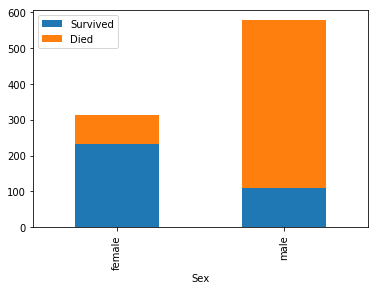

In [13]:
data.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar',stacked=True)

/Users/nuttachot/miniconda3/envs/AI/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


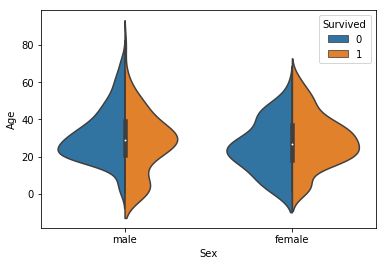

In [10]:
sns.violinplot(x='Sex', y='Age', hue='Survived',data=data,split=True)

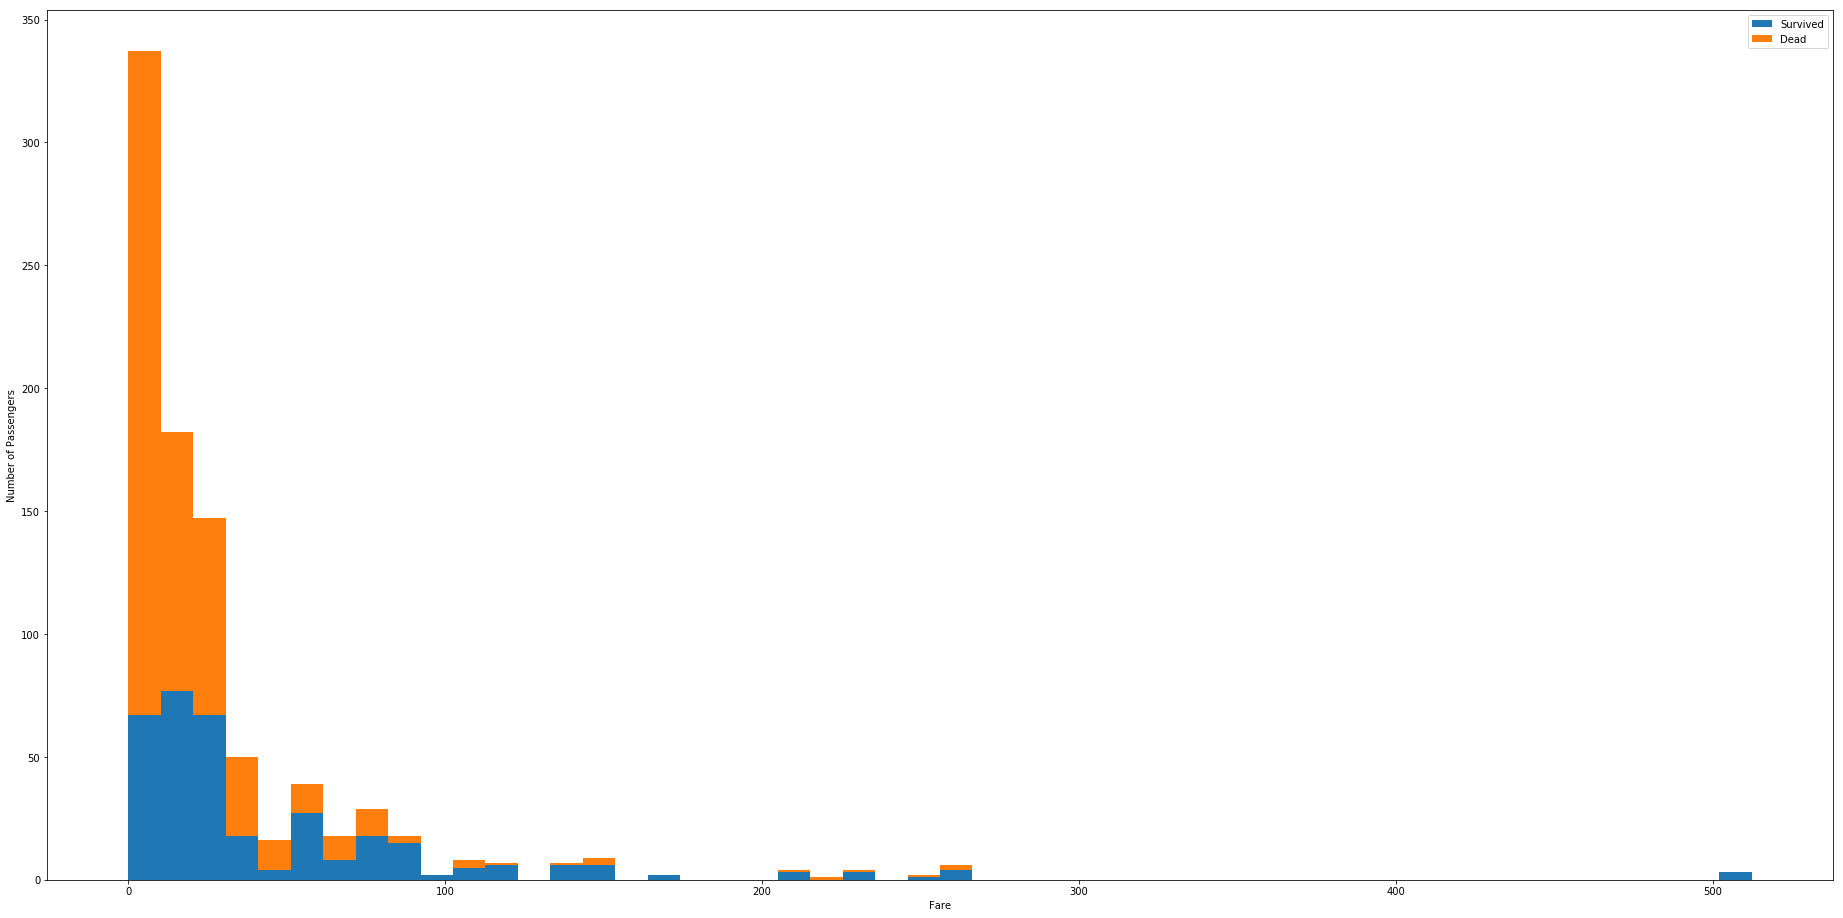

In [11]:
figure = plt.figure(figsize=(32,16))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True,
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend();

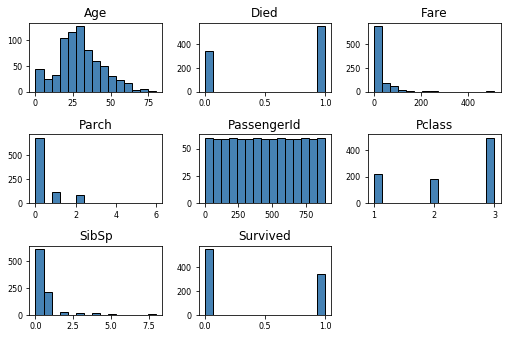

In [15]:
data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

In [18]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

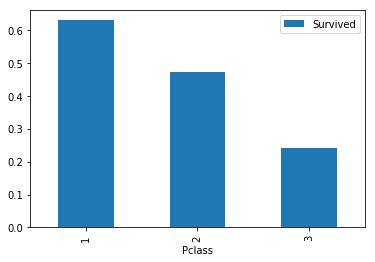

In [19]:
class_pivot = data.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
def loaddf(filename):
    df = pd.read_csv(filename).drop(['Cabin','Ticket','Name'],axis=1) #drop stuff we don't use
    df = pd.concat([df, pd.get_dummies(df['Sex'])],axis=1).drop(['Sex'],axis=1)
    df = pd.concat([df, pd.get_dummies(df['Embarked'])],axis=1).drop(['Embarked'],axis=1)
    df['Fsize']=df['Parch']+df['SibSp']+1 #calculate family size
    return df

In [22]:
def cleanse(df, dropna=True):
    if dropna:
        df = df.dropna()
    else:
        df['Age']=df['Age'].fillna(df['Age'].mean())
        df['Fare']=df['Fare'].fillna(df['Fare'].mean())
        #df['Pclass']=df['Pclass'].fillna(3)
        df=df.fillna(0)
    return df

In [23]:
def load_X(df):
    train_X=df[['male','Pclass','Age','Fsize']]
    return train_X

In [24]:
def load_y(df):
    train_y=df['Survived']
    return train_y

In [29]:
train = cleanse(loaddf('train.csv'),dropna=False)
train_X, train_y = load_X(train),load_y(train)
model = DecisionTreeClassifier(max_depth=3)
model.fit(train_X, train_y)
#pd.DataFrame([model.feature_importances_],columns=train_X.columns )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
train_X.head()

,male,Pclass,Age,Fsize
0,1,3,22.0,2
1,0,1,38.0,2
2,0,3,26.0,1
3,0,1,35.0,2
4,1,3,35.0,1


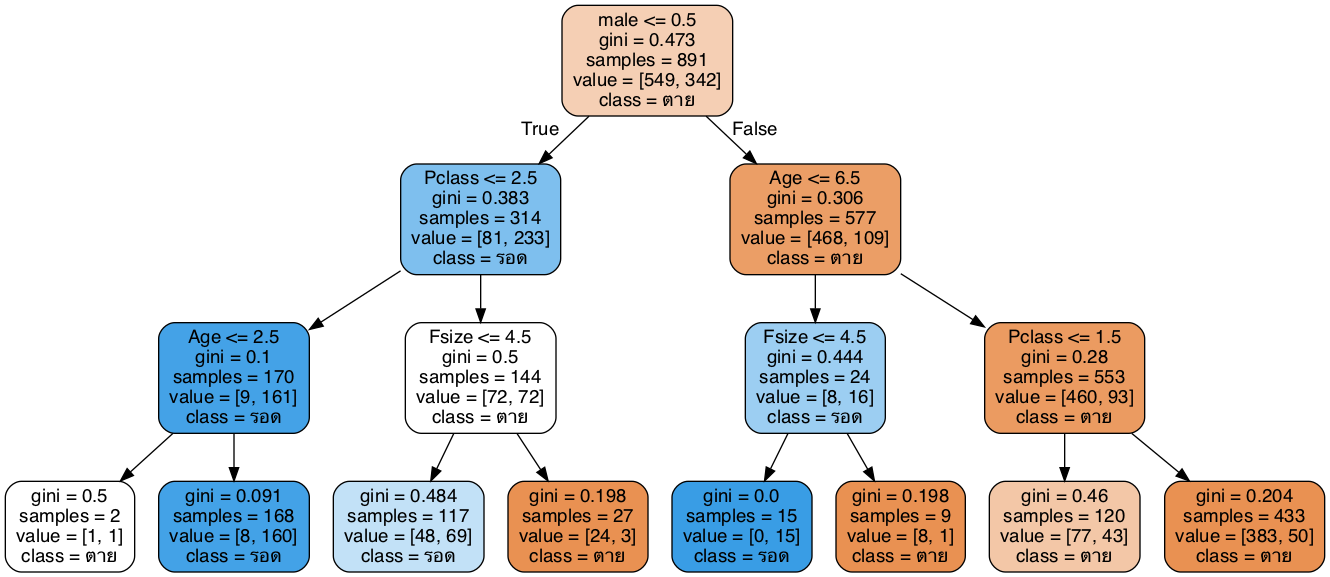

In [31]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='tree.dot', feature_names = train_X.columns.tolist(),class_names=['ตาย','รอด'], filled = True, rounded = True) #,
    
from IPython.display import Image
Image(filename = 'tree.png')